# 직접 해보세요!
## 다변량 그래프 그리기(103쪽)

### 1. seaborn 라이브러리로 바이올린 그래프 그리기 ― 색상 추가

- 먼저 바이올린 그래프를 그리되 그래프의 색상을 추가하자.
- 색상을 추가하는 방법은 아주 간단하다. violinplot 메서드에 Hue 인자값으로 색상에 사용할 열 이름을 추가하면 된다.

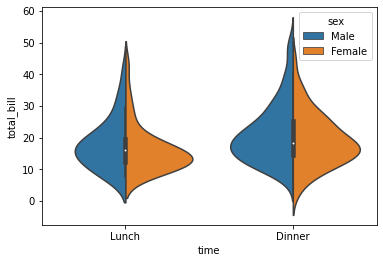

In [36]:
violin, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 
plt.show()

### 2. 산점도, 관계 그래프 그리기 ― 색상 추가

- 산점도 그래프, 관계 그래프를 그리는 경우에도 마찬가지 방법으로 색상을 추가할 수 있다.

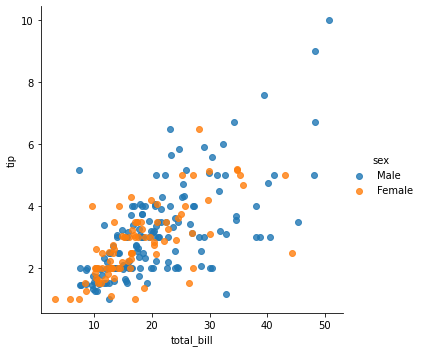

In [37]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False) 
plt.show()

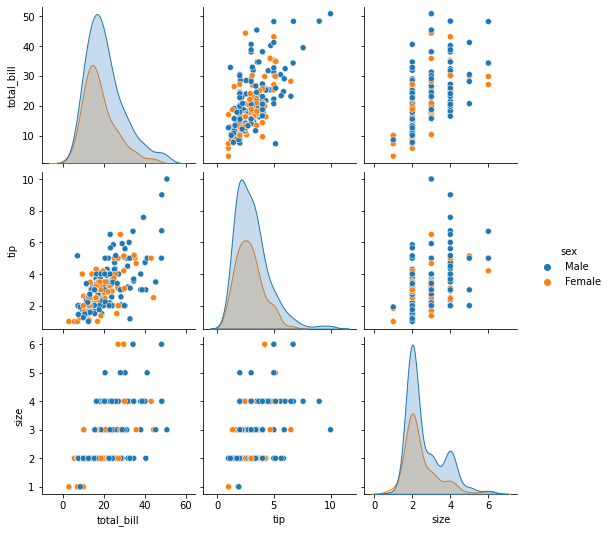

In [38]:
fig = sns.pairplot(tips, hue='sex')

### 3. 산점도 그래프의 크기와 모양 조절하기

- 이번에는 산점도, 그래프의 크기와 모양을 조절해보자.
- 다음은 산점도 그래프의 점 크기를 조절하여 표현한 것이다.

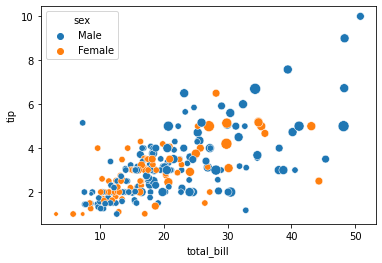

In [43]:
scatter = sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex", s=tips["size"].mul(20))
plt.show()

- 만약 산점도 그래프의 점을 다른 기호로 표현하고 싶다면 markers 인자값에 표현하고자 하는 기호를 리스트에 담아 전달하면 된다.

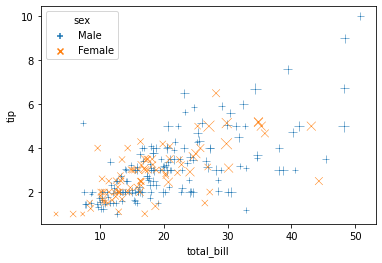

In [66]:
scatter = sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex", style="sex", markers=["+", "x"], s=tips["size"].mul(20))
plt.show()

### 5. lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기

- Implot메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기
- 앤스콤 4분할 그래프를 Implot메서드로 그린 것이다. x와 y인자에는 앤스콤 데이터 집합의 x, y열을 전달하고 data 인자에는 데이터프레임을 전달 했다.
- 그런데 자세히 보면 4개의 데이터 그룹이 한꺼번에 산점도 그래프로 그려진 것을 알 수 있다.
- 그룹별로 그래프를 나누어 그리려면 어떻게 해야할까?

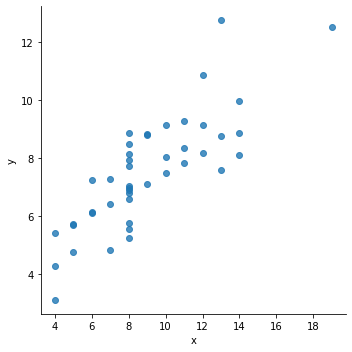

In [67]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)

- 그룹별로 그래프를 나누어 그리려면 Implot메서드에 추가로 col, col_warp인자를 설정해야 한다.
- 다음은 Implot 메서드를 사용해 데이터 그룹별로 그래프를 그린 것이다.
- col_wrap 인자에 그래프를 그릴 열의 최대값을 지정하고 col인자에는 데이터 그룹을 구분할 열(dataset)을 지정했다.

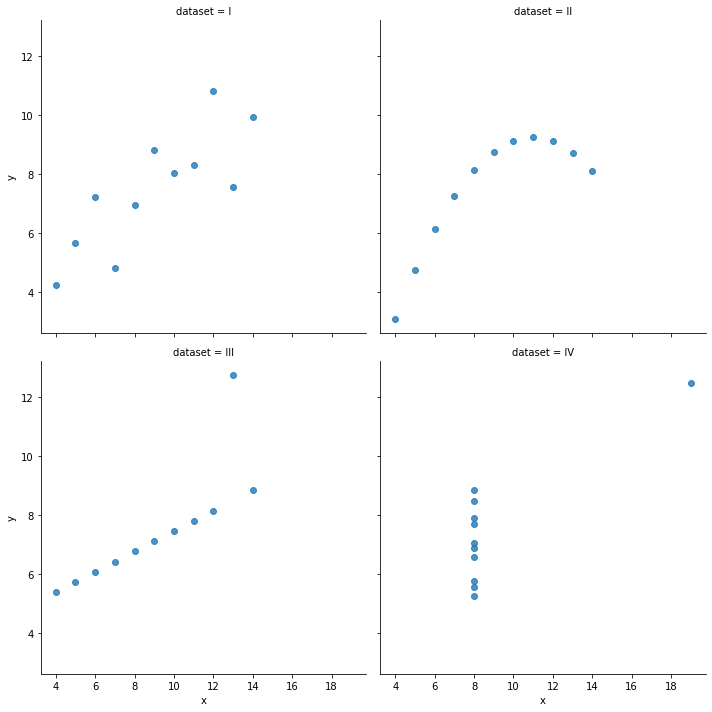

In [68]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)

# 알아두면 좋아요!
## FacetGrid 클래스로도 그룹별 그래프를 그릴 수 있습니다(108쪽)

- 만약 Implot 메서드를 사용하는 방법이 복잡하게 느껴진다면 FacetGrid 클래스를 사용하여 간편하게 그래프를 그릴 수 있다.
- 이번에는 tips데이터 집합을 사용하여 그래프를 그려보겠다.
- 먼저 FacetGrid에 데이터프레임과 그룹을 구분할 열 이름을 전달하여 객체를 생성한다. 그런 다음 객체(facet)의 map 메서드에 그래프의 종류(histplot)와 x축으로 지정할 열 이름을 순서대로 전달하면 히스토그램 그래프를 그릴 수 있다.

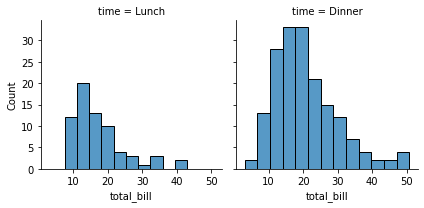

In [72]:
facet = sns.FacetGrid(tips, col='time') 
facet.map(sns.histplot, 'total_bill') 

- 다변량 그래프도 그려보자. 다음은 tips 데이터 집합의 day 열로 그룹을 구분하여 그래프를 그린 것이다.

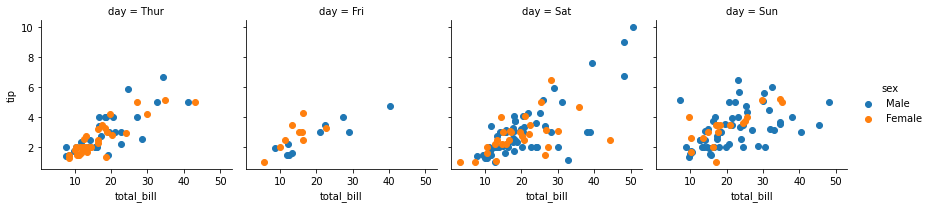

In [73]:
facet = sns.FacetGrid(tips, col='day', hue='sex') 
facet = facet.map(plt.scatter, 'total_bill', 'tip') 
facet = facet.add_legend() 

- 이번에는 더 많은 변수를 사용하여 그래프를 그려보겠다. 다음은 time, smoker 열을 사용하여 산점도 그래프를 그린 것이다.
- time, smoker 열은 각각 2개의 값을 가지고 있다.(Dinner/Lunch, Yes/No)

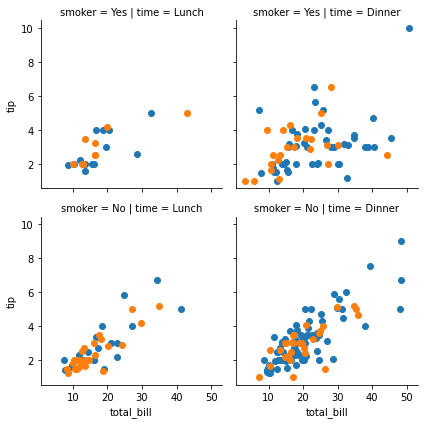

In [74]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') 
facet.map(plt.scatter, 'total_bill', 'tip') 